# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.  
  
Independent Variables:  
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases  
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions  
3.	Married - This refers to applicant being in a state of matrimony  
4.	Dependents - This refres to persons who depends on the applicants for survival  
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university  
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer  
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.  
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.  
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.  
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant  
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.  
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.  
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.  
  
## Prediction:    
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

## Understanding the Data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preparation of the Data

In [7]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [10]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [11]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#df = df.drop(['FEATURE1', 'FEATURE2', 'FEATURE3', 'FEATURE4'], axis=1)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
#df = df.dropna(axis=0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Understanding Features

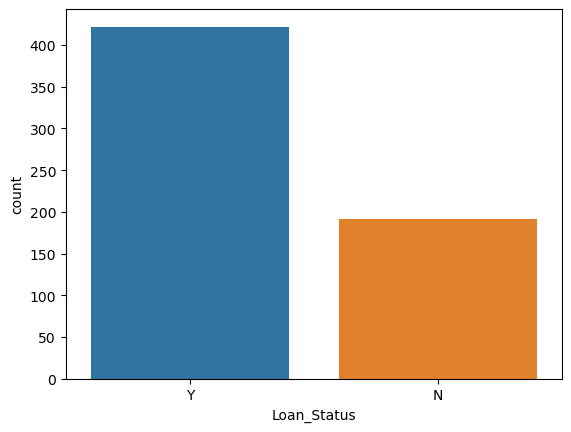

In [18]:
sns.countplot(x='Loan_Status', data=df);

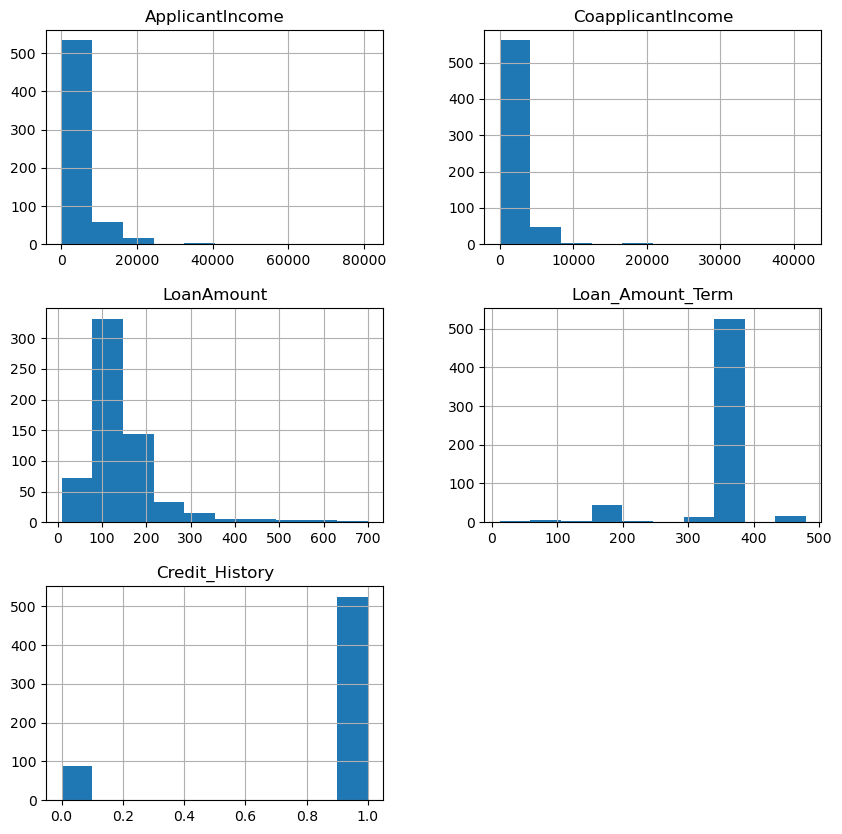

In [19]:
df.hist(bins=10,figsize=(10,10));

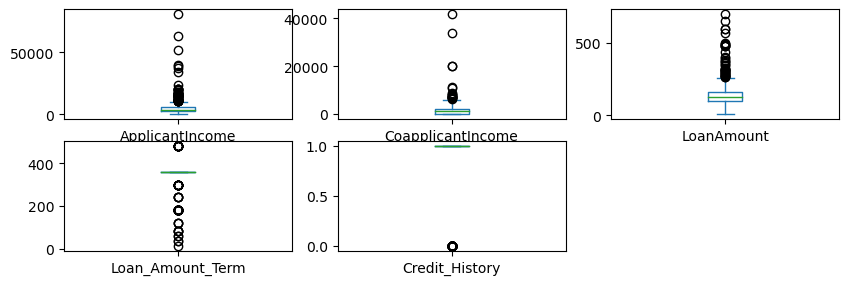

In [20]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10));

## Understanding Feature Relationships

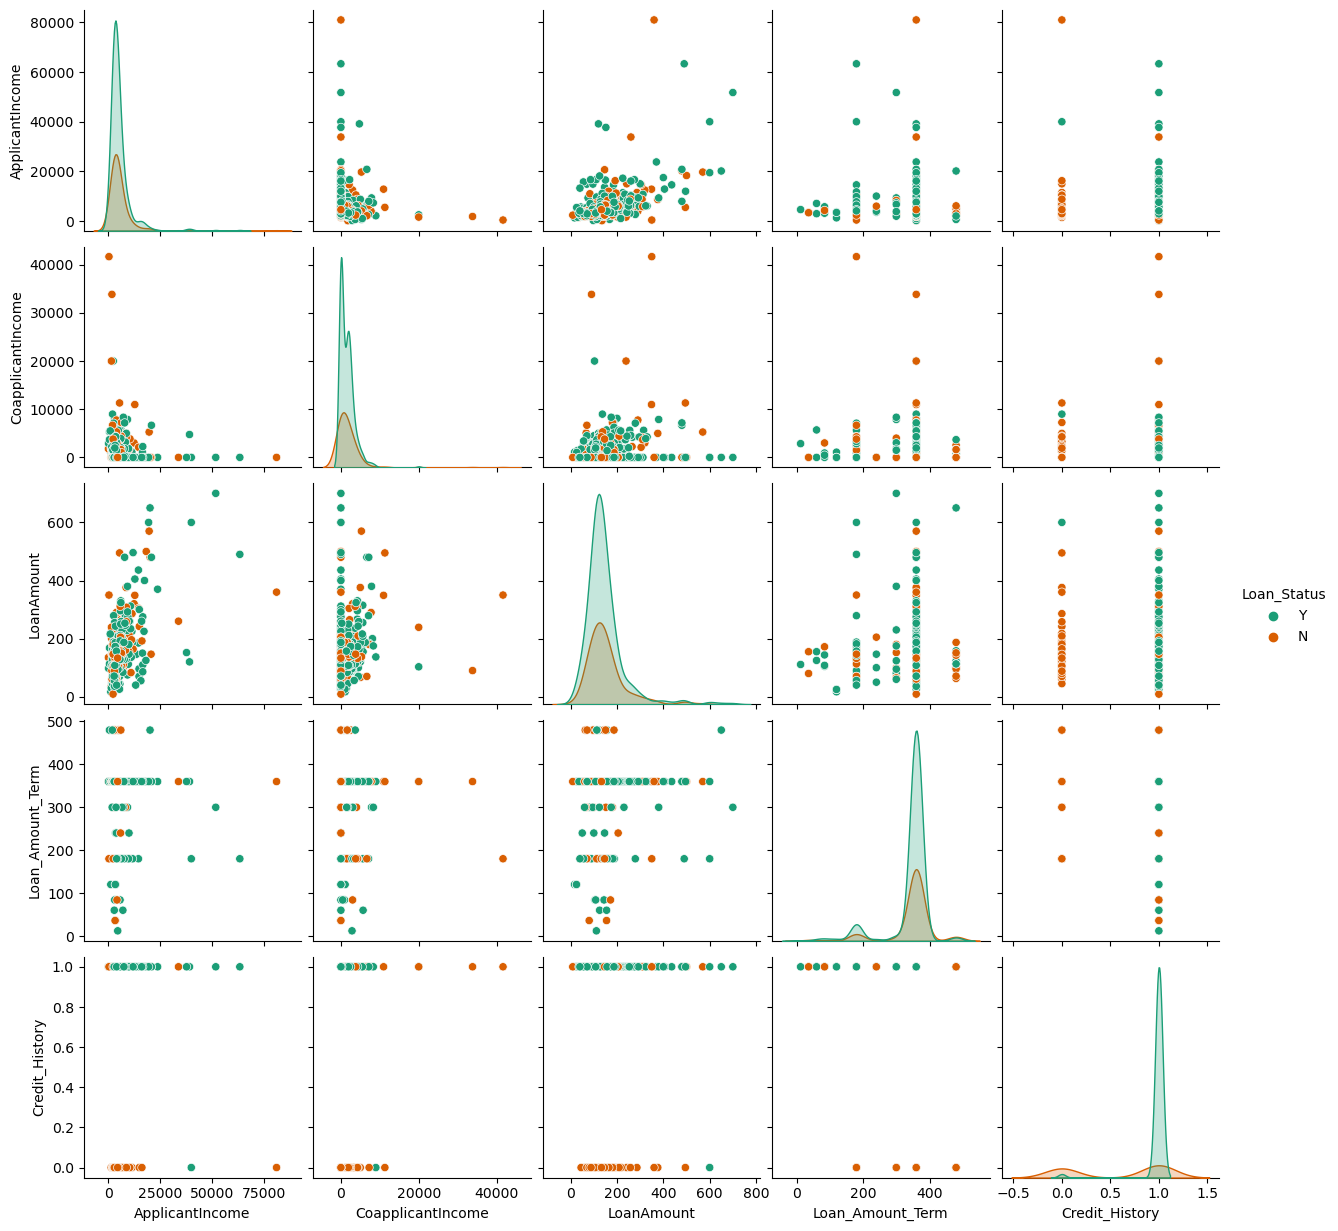

In [21]:
sns.pairplot(df, palette="Dark2", hue='Loan_Status');

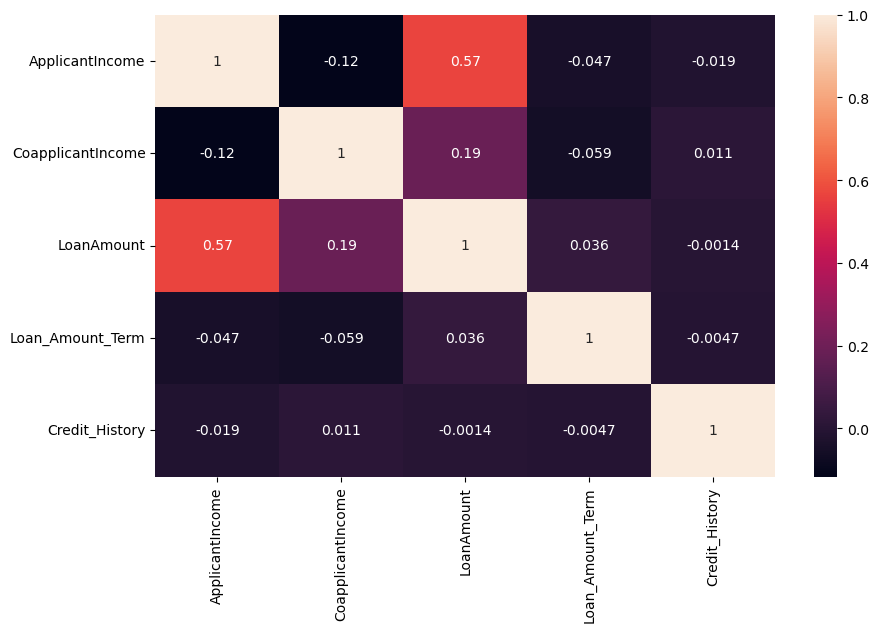

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [23]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


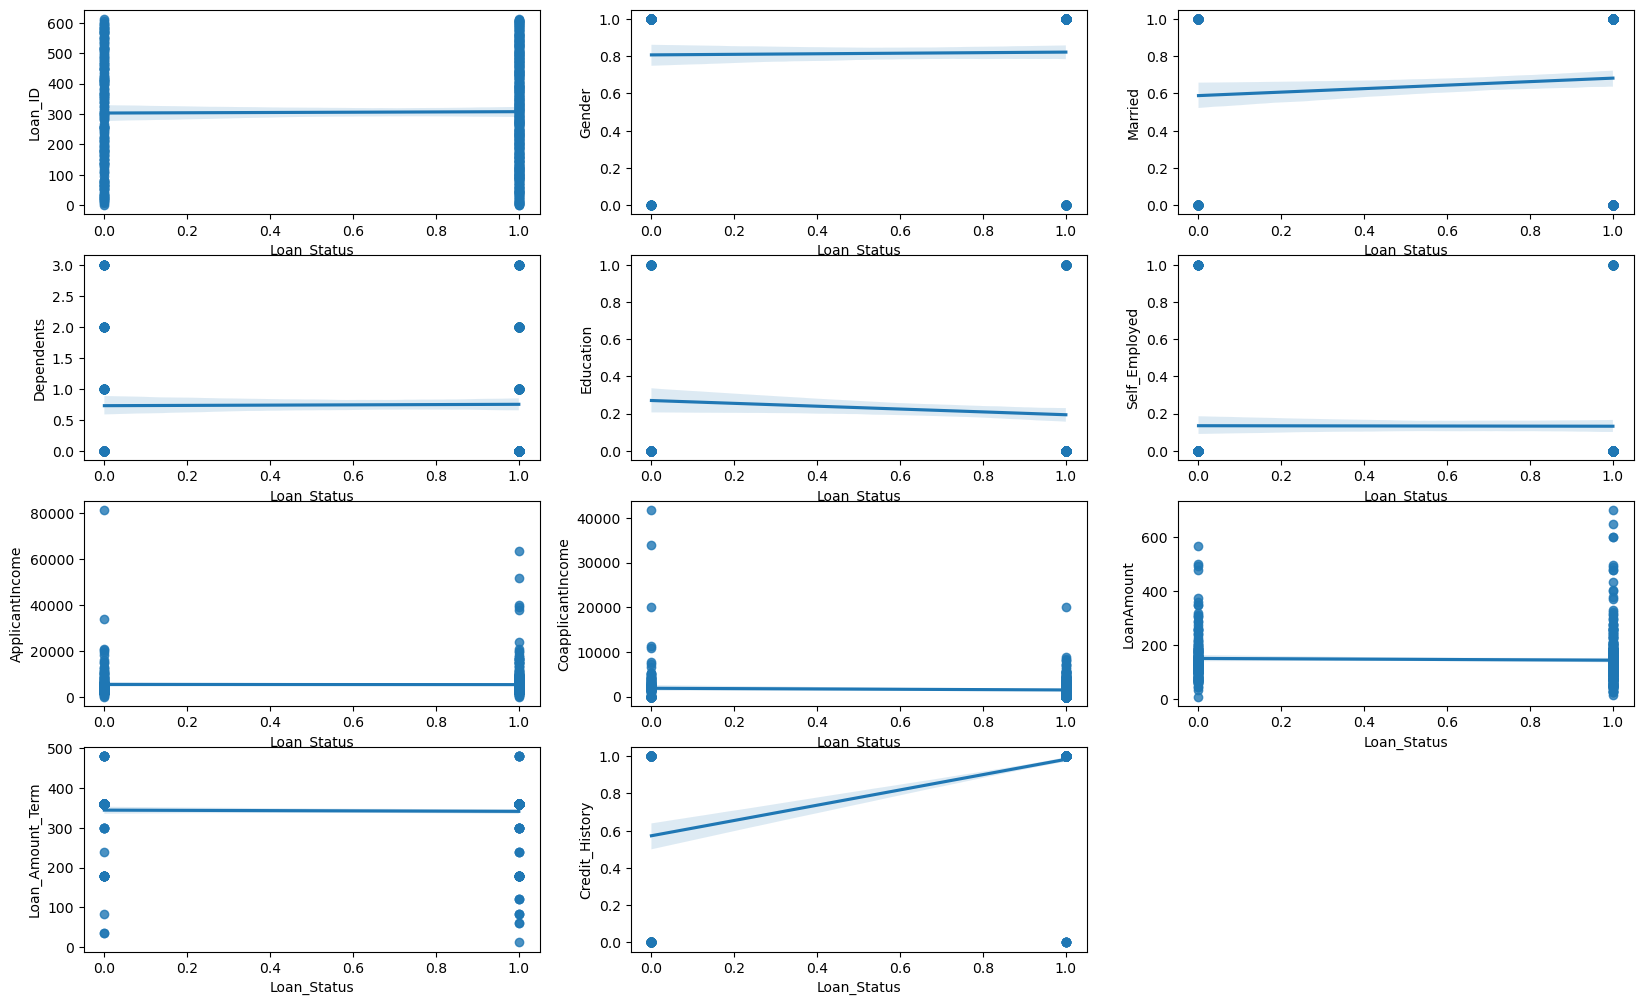

In [24]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(8,3,p)
        sns.regplot(x='Loan_Status', y=i, data=df)
        plt.xlabel('Loan_Status')
        plt.ylabel(i)
    p+=1
plt.show()

## Model Preparation

In [25]:
df_skew = df.skew()
df_skew

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [26]:
for index, value in df_skew.items():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           0.453698
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [27]:
x = df.drop(['Loan_Status'], axis=1)
y = df[['Loan_Status']]

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.009126,Loan_ID
1,6.485492,Gender
2,3.976432,Married
3,2.016162,Dependents
4,1.320569,Education
5,1.204628,Self_Employed
6,36.890794,ApplicantIncome
7,3.199662,CoapplicantIncome
8,66.266189,LoanAmount
9,41.000683,Loan_Amount_Term


In [29]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [30]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.036955,Loan_ID
1,1.196453,Gender
2,1.380933,Married
3,1.199706,Dependents
4,1.068939,Education
5,1.043847,Self_Employed
6,2.038864,ApplicantIncome
7,1.525157,CoapplicantIncome
8,1.842307,LoanAmount
9,1.044828,Loan_Amount_Term


In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation

In [32]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(xtrain, xtest, ytrain, ytest)
print(models);

 97%|█████████▋| 28/29 [00:03<00:00,  7.23it/s]

[LightGBM] [Info] Number of positive: 317, number of negative: 143
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689130 -> initscore=0.796057
[LightGBM] [Info] Start training from score 0.796057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████| 29/29 [00:03<00:00,  7.48it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.82               0.76     0.76      0.81   
XGBClassifier                      0.82               0.75     0.75      0.81   
RandomForestClassifier             0.83               0.75     0.75      0.81   
BaggingClassifier                  0.80               0.74     0.74      0.79   
QuadraticDiscriminantAnalysis      0.83               0.73     0.73      0.81   
NearestCentroid                    0.83               0.73     0.73      0.81   
ExtraTreesClassifier               0.81               0.73     0.73      0.80   
SVC                                0.82               0.72     0.72      0.80   
RidgeClassifierCV                  0.82               0.72     0.72      0.80   
RidgeClassifier                    0.82               0.72     0.72      0.80   
NuSVC                       

## Model Evaluation

In [33]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()

In [34]:
lgbm_clf.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 317, number of negative: 143
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689130 -> initscore=0.796057
[LightGBM] [Info] Start training from score 0.796057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [35]:
grid_param = {'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 7],
              'num_leaves': [3, 5, 10,15, 31, 63],
              'n_estimators': [50, 100, 200]}

In [36]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=grid_param, cv=2, verbose=3)

In [37]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 158, number of negative: 72
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686957 -> initscore=0.785929
[LightGBM] [Info] Start training from score 0.785929
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=50, num_leaves=3;, score=0.800 total time=   0.0s
[LightGBM] [Info] Number of positive: 159, number of negative: 71
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [3, 5, 10, 15, 31, 63]},
             verbose=3)

In [38]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 5}

## Final Model

When comparing models LGBMClassifier had the highest accuracy at 0.82, balanced accuracy at 0.76, ROC AUC of 0.76, and F1 Score 0.81. It did have a long training time of 0.74, but that wasn't much of a factor due to the size of the dataset.

In [39]:
Final_model = LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=50, num_leaves=5)

In [40]:
from sklearn.metrics import accuracy_score

Final_model.fit(xtrain,ytrain)
pred = Final_model.predict(xtest)
acc = accuracy_score(ytest,pred)
print(acc*100)

[LightGBM] [Info] Number of positive: 317, number of negative: 143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689130 -> initscore=0.796057
[LightGBM] [Info] Start training from score 0.796057
82.46753246753246
